In [1]:
# Doing the necessary imports
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#Kmeans ,Hierarchical clustering,DBSCAN(Density Based Spatial Clustering of Apllications with Noise)

In [36]:
#KMeans Clustering

Consider a collection of points that are sampled from three different densities, in this case normal densities with the same covariances but different means.

In [26]:
data = r_[10*randn(1000,2)+array([70,30]),
          10*randn(1000,2)+array([10,10]),
          10*randn(1000,2)+array([50,80])]

In [27]:
data

array([[76.94356939, 28.54445794],
       [74.11128492, 31.3563596 ],
       [66.09320806, 35.21474653],
       ...,
       [56.88000264, 83.18750512],
       [45.06173439, 82.29108665],
       [45.5803381 , 78.46552671]])

In [28]:
data.shape

(3000, 2)

In [29]:
data.size

6000

In [22]:
data=data[pyrandom.sample(range(len(data)),len(data))]

In [23]:
data

array([[72.60479315, 36.34061641],
       [39.00075373, 77.7506182 ],
       [65.73027018, 15.04099058],
       ...,
       [85.56402056, 23.00108366],
       [65.786513  , 15.55167238],
       [19.46041772, -6.0895287 ]])

In [24]:
data.size

6000

In [25]:
data.shape

(3000, 2)

In [34]:
data[:,0]

array([76.94356939, 74.11128492, 66.09320806, ..., 56.88000264,
       45.06173439, 45.5803381 ])

In [35]:
data[:,1]

array([28.54445794, 31.3563596 , 35.21474653, ..., 83.18750512,
       82.29108665, 78.46552671])

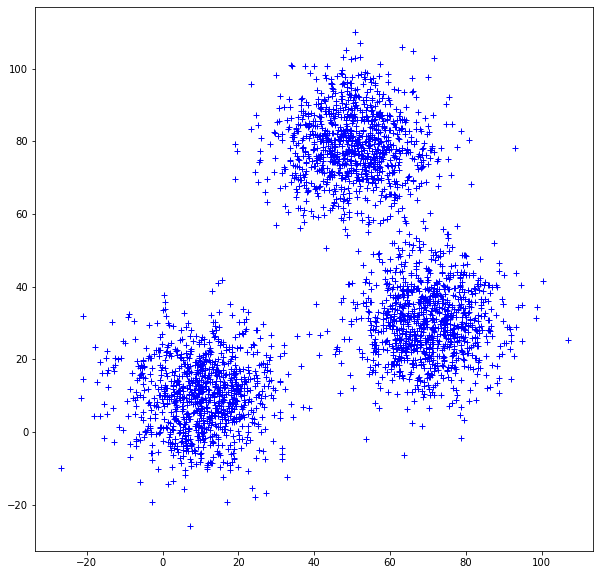

In [38]:
figsize(10,10)
plot(data[:,0],data[:,1],"b+")

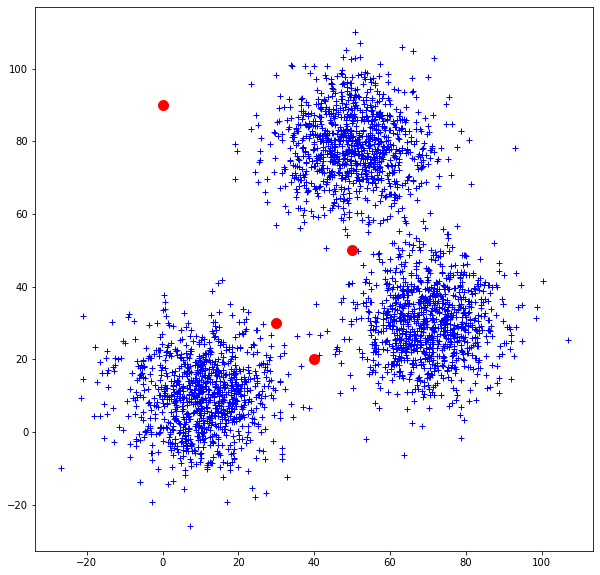

In [40]:
protos = array([[30,30],[40,20],[0,90],[50,50]]) # Initialize centroids
start = protos.copy()

figsize(10,10)
plot(data[:,0],data[:,1],'b+')
plot(protos[:,0],protos[:,1],'ro',markersize=10)

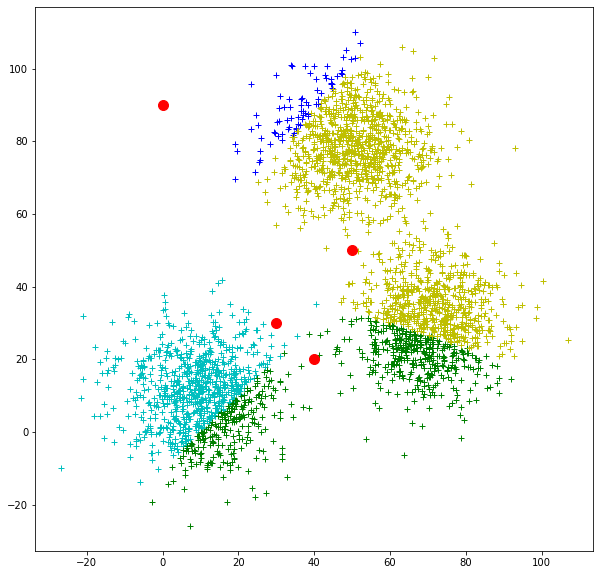

In [47]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
    plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [48]:
history = [protos.copy()]

for i in range(len(protos)):
    protos[i,:] = average(data[closest==i],axis=0)
    
history.append(protos.copy())

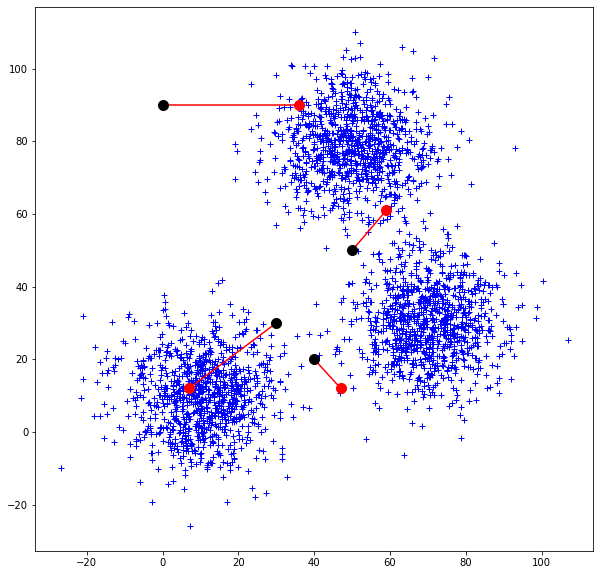

In [51]:
# Plotting the centroid movements
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
harray = array(history)
for i in range(len(protos)):
    plot(harray[:,i,0],harray[:,i,1],'r')
plot(harray[0,:,0],harray[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [52]:
for round in range(1000):
    if round%100==0: sys.stderr.write("%d "%round)
    dists = cdist(protos,data)
    closest = argmin(dists,axis=0)
    for i in range(len(protos)):
            protos[i,:] = average(data[closest==i],axis=0)
    history.append(protos.copy())

0 100 200 300 400 500 600 700 800 900 

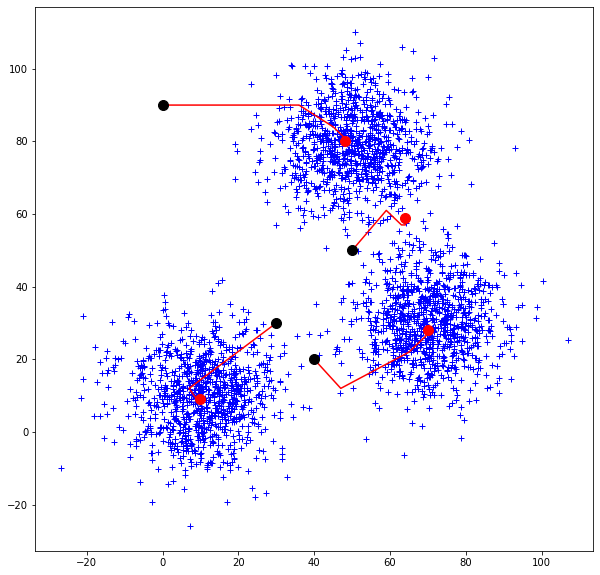

In [53]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
history = array(history)
for i in range(len(protos)):
    plot(history[:,i,0],history[:,i,1],'r')
plot(history[0,:,0],history[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

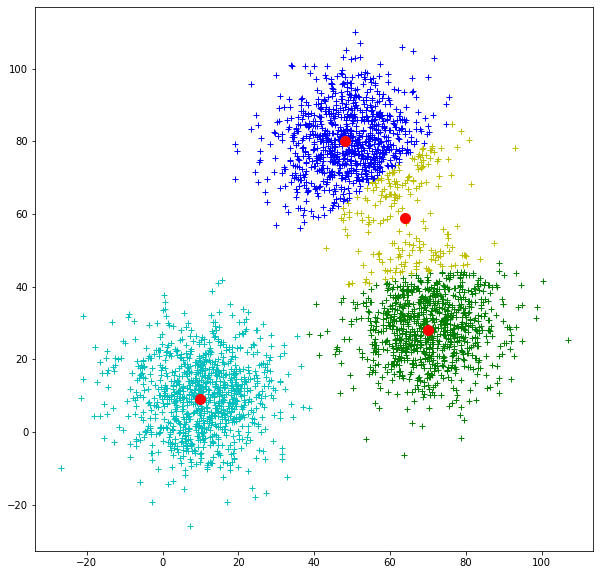

In [54]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
  plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [55]:
#Code With Actual Data
#Obtain Value Of K with the help of Elbow Method

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [59]:
data=pd.read_csv("D:\ineuron\MachineLearningFiles\MLAlgos\ML4\clustering\Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [61]:
x=data.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


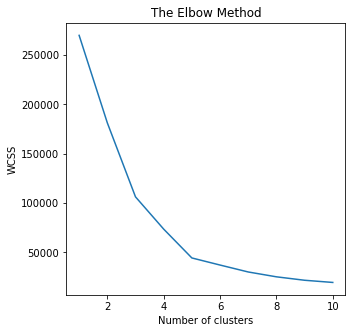

In [84]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    #print(wcss)
figsize(5,5)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [120]:
# Fitting K-Means to the dataset with value of 5 found through ELbow Method
kmeans=KMeans(n_clusters=5,init='k-means++', random_state = 42)
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [121]:
# It predicts the cluster number to which the datapoint belongs to
test=kmeans.predict(np.asarray([[137,83]]))
test[0]

2

In [122]:
#Saving the model
import pickle
filename="finalized_Model.pickle"
pickle.dump(kmeans,open(filename,"wb"))

In [123]:
Kmeans_model=pickle.load(open(filename,"rb"))

In [124]:
predfromSavedModel=Kmeans_model.predict(np.asarray([[3,3]]))
print("Data belongs to:", predfromSavedModel[0] ," Cluster")

Data belongs to: 3  Cluster


In [125]:
# Looking at the points which belong to Cluster0
x[y_kmeans==0]

,Annual Income (k$),Spending Score (1-100)
1,15,81
3,16,77
5,17,76
7,18,94
9,19,72
11,19,99
13,20,77
15,20,79
17,21,66
19,23,98


In [126]:
x[y_kmeans==1]

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42
...,...,...
121,67,40
122,69,58
126,71,35
132,72,34


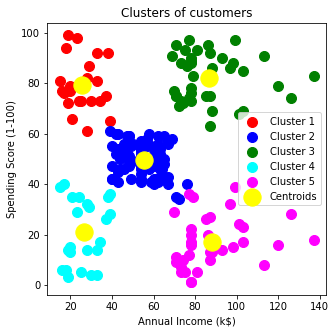

In [128]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0]['Annual Income (k$)'], x[y_kmeans == 0]['Spending Score (1-100)'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1]['Annual Income (k$)'], x[y_kmeans == 1]['Spending Score (1-100)'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2]['Annual Income (k$)'], x[y_kmeans == 2]['Spending Score (1-100)'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3]['Annual Income (k$)'], x[y_kmeans == 3]['Spending Score (1-100)'], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4]['Annual Income (k$)'], x[y_kmeans == 4]['Spending Score (1-100)'], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [129]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [ ]:
#If we already know the centroids
#good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
#kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [130]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(x)

MiniBatchKMeans(n_clusters=5)

Hierarchical clustering

In [131]:
# Importing the necessary libraries
import random as pyrandom
from scipy.spatial.distance import cdist
figsize(6,6)

In [132]:
#Defining a method to plot the clusters
ccolors = ['go', 'ro','bo','mo','co','yo']
def plotclusters(data,centers=None):
    xlim([0,100]); ylim([0,100])
    if centers is None:
        plot(data[:,0],data[:,1],'bo',markersize=5)
    else:
        for i in range(amax(centers)+1):
            plot(data[centers==i,0],data[centers==i,1],ccolors[i%len(ccolors)],markersize=5)

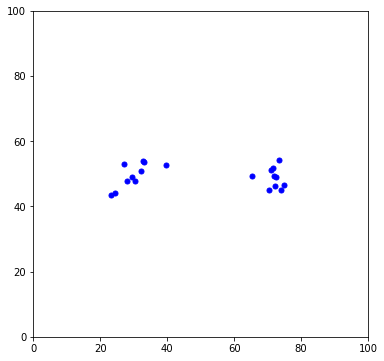

In [133]:
# A Simple Clustering Problem
data = r_[4*randn(10,2)+array([70,50]),
          4*randn(10,2)+array([30,50])]
# shuffle(data)
plotclusters(data)

In [134]:
# Compute distance between each pair of the two collections of inputs i.e., calculate distance between all the points in data
from scipy.spatial.distance import cdist
ds = cdist(data,data)

In [137]:
ds

array([[ 0.        ,  7.07718745,  2.71904763,  0.88417328,  6.78735339,
         6.70809944,  2.45679239,  5.32430319,  6.06515462,  3.11647972,
        43.97542877, 47.80360147, 38.93799672, 49.06239478, 42.29491499,
        32.06462184, 39.50493888, 44.69425997, 38.65174916, 41.60060232],
       [ 7.07718745,  0.        ,  4.3608658 ,  6.71106404,  9.74079567,
         3.42177582,  4.6965846 ,  2.2705304 ,  1.71230655,  9.36324835,
        46.19013776, 49.48223141, 42.11051094, 50.66677227, 44.66642668,
        35.17458866, 42.21291136, 47.62816078, 41.78782541, 43.77361298],
       [ 2.71904763,  4.3608658 ,  0.        ,  2.40561759,  7.18861912,
         4.44579637,  0.50518638,  2.71429183,  3.49174651,  5.31684162,
        44.61520828, 48.23944267, 39.95198269, 49.47179458, 42.99306588,
        33.02807855, 40.3309113 , 45.62605454, 39.64992384, 42.21691497],
       [ 0.88417328,  6.71106404,  2.40561759,  0.        ,  6.0130119 ,
         5.99216025,  2.0155131 ,  4.78749365,  

In [136]:
from scipy.cluster.hierarchy import *

In [140]:
lm=linkage(ds,"single")
lm[:5]

<ipython-input-140-a8fcde3b6ce6>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  lm=linkage(ds,"single")


array([[12.        , 18.        ,  1.19572829,  2.        ],
       [ 2.        ,  6.        ,  1.89700341,  2.        ],
       [ 0.        ,  3.        ,  2.85442241,  2.        ],
       [14.        , 19.        ,  3.81268941,  2.        ],
       [ 1.        ,  8.        ,  4.12260786,  2.        ]])

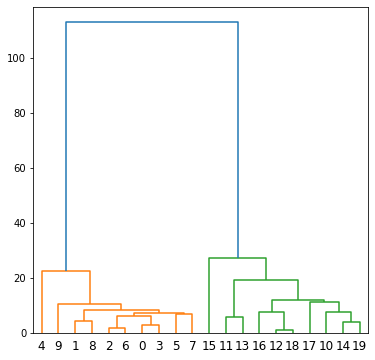

In [141]:
_=dendrogram(lm)

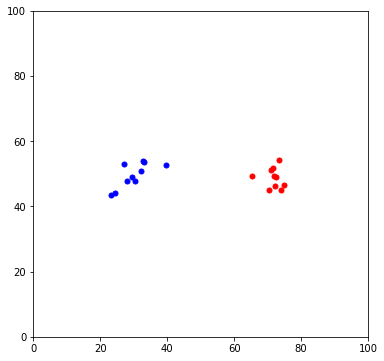

In [146]:
## Plotting the individual clusters
plotclusters(data,fcluster(lm,2,criterion='maxclust'))

In [147]:
fcluster(lm,2,criterion='maxclust')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [148]:
#Linkage Methods
# Taking a data for example
data = r_[dot(randn(100,2),diag([4,10]))+array([60,60]),
           dot(randn(100,2),diag([4,10]))+array([40,40])]
shuffle(data)

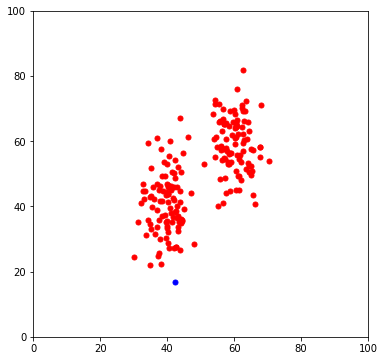

In [152]:
assignment = fclusterdata(data,2,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

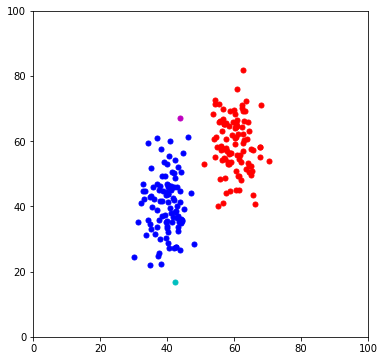

In [153]:
#single
assignment = fclusterdata(data,4,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

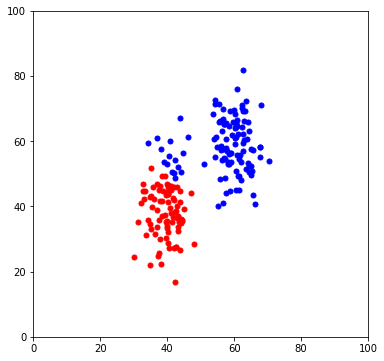

In [156]:
#Complete
assignment = fclusterdata(data,2,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

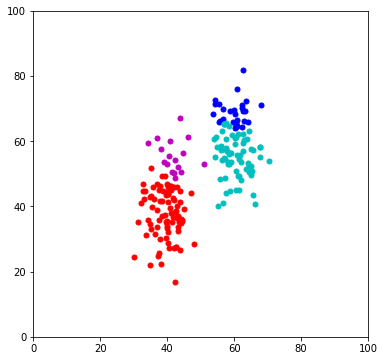

In [157]:
assignment = fclusterdata(data,4,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

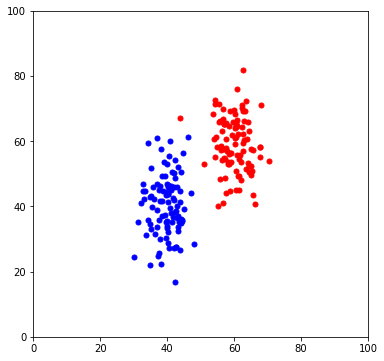

In [158]:
#Average
assignment = fclusterdata(data,2,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

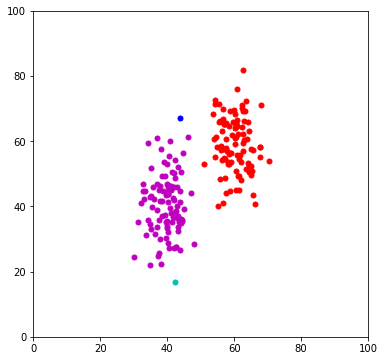

In [159]:
assignment = fclusterdata(data,4,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

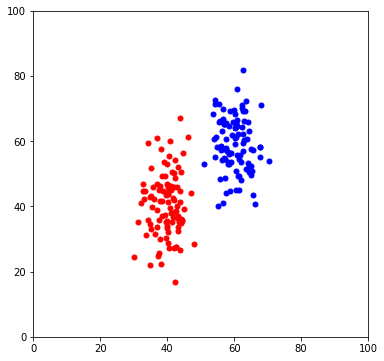

In [160]:
#Centroid Linkage
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

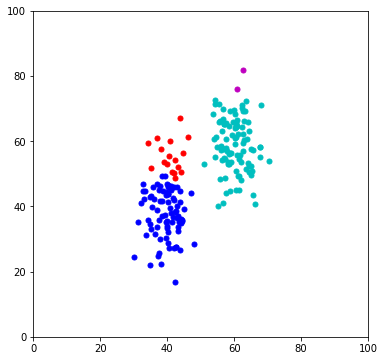

In [161]:
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,4,criterion='maxclust')
plotclusters(data,assignment)

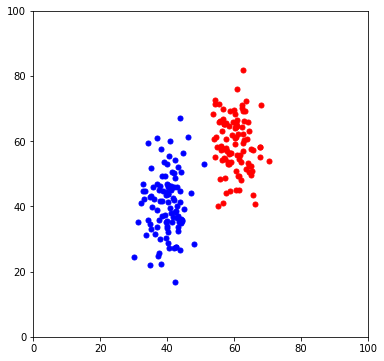

In [162]:
#Ward
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

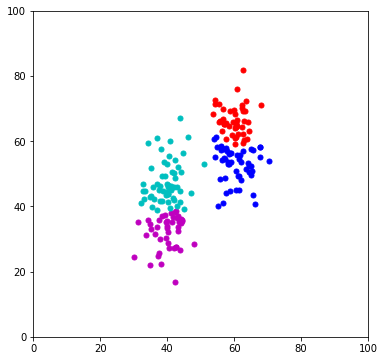

In [163]:
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,4,criterion='maxclust')
plotclusters(data,assignment)

In [164]:
#DBSCAN(Density Based Spatial Clustering of Apllications with Noise)

In [165]:
# Necessary Imports

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [167]:
# Data creation
centers = [[1, 1], [-1, -1], [1, -1]]  
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)  # generate sample blobs

X

array([[ 0.84022039,  1.14802236],
       [-1.15474834, -1.2041171 ],
       [ 0.67863613,  0.72418009],
       ...,
       [ 0.26798858, -1.27833405],
       [-0.88628813, -0.30293249],
       [ 0.60046048, -1.29605472]])

In [168]:
X = StandardScaler().fit_transform(X)

In [169]:
db=DBSCAN(eps=0.3,min_samples=10).fit(X)

In [170]:
db

DBSCAN(eps=0.3, min_samples=10)

In [179]:
# creating an array of true and false as the same size as db.labels
core_samples_mask=np.zeros_like(db.labels_,dtype=bool)
#setting the indices of the core regions to True
core_samples_mask[db.core_sample_indices_] = True 
# similar to the model.fit() method, it gives the labels of the clustered data
labels=db.labels_

In [181]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # the label -1 is considered as noise by the DBSCAN algorithm
n_noise_ = list(labels).count(-1)  # calculating the number of clusters

In [183]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

"""Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters
contain only data points which are members of a single class."""

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953


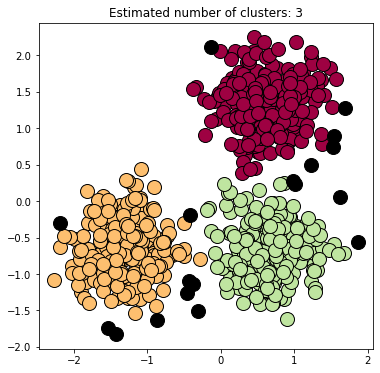

In [184]:
# Plot result
import matplotlib.pyplot as plt

# Black  is used for noise.
unique_labels = set(labels)  # identifying all the unique labels/clusters
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]  # creating the list of colours, generating the colourmap



for k, col in zip(unique_labels, colors):
    
    
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)   # assigning class members for each class
    

    xy = X[class_member_mask & core_samples_mask] # creating the list of points for each class
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    

    xy = X[class_member_mask & ~core_samples_mask] # creating the list of noise points
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
    

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
Evalution Metris
print("Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))

In [188]:
metrics.jaccard_similarity_score(labels_true, labels)


AttributeError: module 'sklearn.metrics' has no attribute 'jaccard_similarity_score'

In [197]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [198]:
purity_score(labels_true, labels)

0.9813333333333333

In [199]:
#Internal

In [204]:
metrics.silhouette_score

<function sklearn.metrics.cluster._unsupervised.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)>

In [205]:
metrics.silhouette_score(data,4,metric='euclidean',method='average',criterion='maxclust')

ValueError: y should be a 1d array, got an array of shape () instead.